In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
columns to use:
neighborhood
bedrooms
month


In [30]:
data_2015 = pd.read_csv('/Users/amishdalal/DSI-NYC-2/projects/projects-capstone/AirBnB/airbnb_data.csv',index_col=0)
data_2015.rename(columns = {'neighbourhood':'neighborhood'},inplace = True)
data_2015.head()

,listing_id,year,month,days_per_month,available,occupied,occ_yr,occ%,occ_yr%,avg_price,neighborhood,zipcode,bedrooms,bathrooms,number_of_reviews,review_scores_rating,price,area,num_comp,revpar
0,5044,2015,1,30,0,30,269,100.00,73.7,175.0,East Village,10003,1,1.0,31.0,95.0,175,Manhattan,468,175.000
1,5044,2015,2,28,12,16,269,57.14,73.7,175.0,East Village,10003,1,1.0,31.0,95.0,175,Manhattan,468,99.995
2,5044,2015,3,31,3,28,269,90.32,73.7,175.0,East Village,10003,1,1.0,31.0,95.0,175,Manhattan,468,158.060
3,5044,2015,4,30,0,30,269,100.00,73.7,175.0,East Village,10003,1,1.0,31.0,95.0,175,Manhattan,468,175.000
4,5044,2015,5,31,7,24,269,77.42,73.7,175.0,East Village,10003,1,1.0,31.0,95.0,175,Manhattan,468,135.485


In [31]:
avg_occ = data_2015.groupby(['neighborhood','bedrooms','month'])['days_per_month','occupied'].sum()
avg_occ.reset_index(inplace = True)
avg_occ['occ_yr%'] = (100*(avg_occ['occupied'] / avg_occ['days_per_month'])).round(2)
avg_occ.head()

,neighborhood,bedrooms,month,days_per_month,occupied,occ_yr%
0,Alphabet City,0,1,147,35,23.81
1,Alphabet City,0,2,140,30,21.43
2,Alphabet City,0,3,155,96,61.94
3,Alphabet City,0,4,150,99,66.00
4,Alphabet City,0,5,155,89,57.42


In [53]:
cols = ['month','bedrooms','number_of_reviews','review_scores_rating','neighborhood','num_comp','occ%','avg_price']
data = data_2015.loc[:,cols]
data

X = pd.get_dummies(data.iloc[:,:-1],columns = ['month','neighborhood'])
y = data['avg_price']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 25,test_size=0.33)
gb = GradientBoostingRegressor(n_estimators=1000)
gb = gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print mean_squared_error(y_test,gb_pred)
print r2_score(y_test,gb_pred)

1968.87309645
0.799513473095


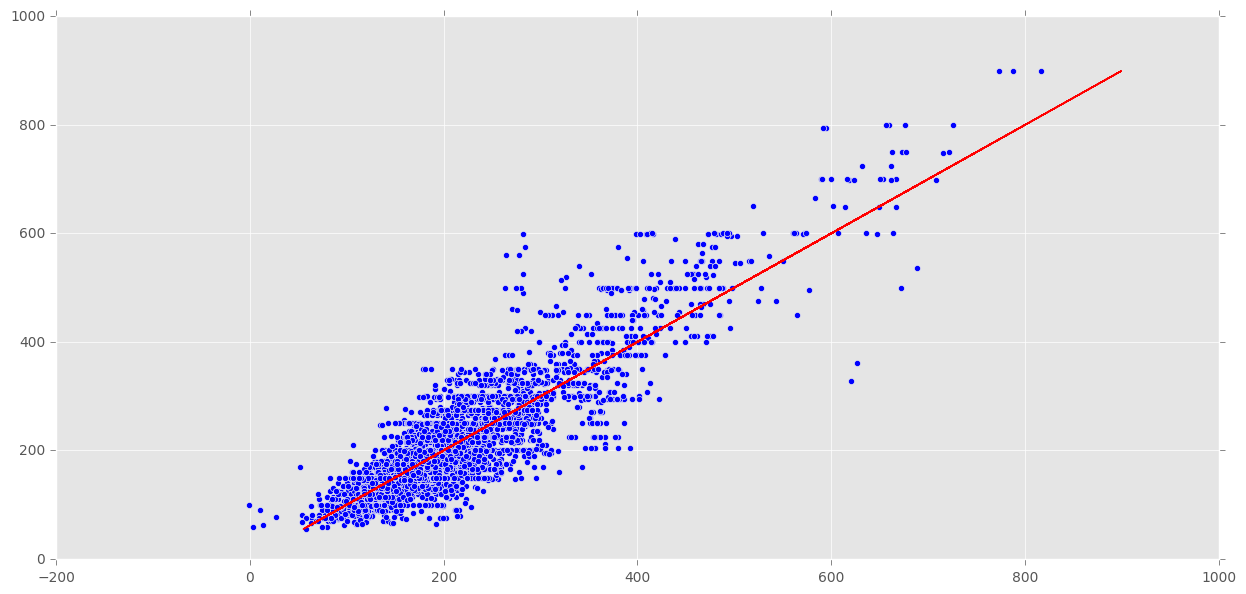

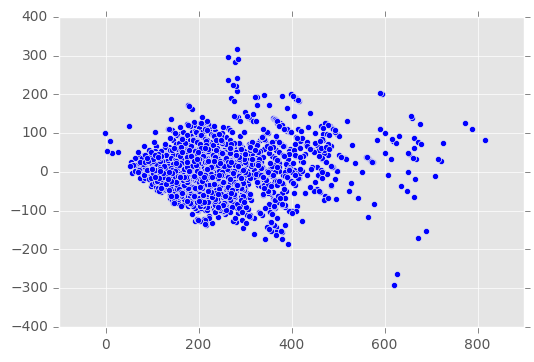

In [47]:
plt.subplots(figsize=(15,7))
plt.scatter(gb_pred,y_test)
plt.plot(y_test,y_test,'-',color='red')
plt.show()

plt.scatter(gb_pred,y_test-gb_pred)
plt.show()


### Relaxing the model by taking out num_comps and occupancy%

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
data_2015 = pd.read_csv('/Users/amishdalal/DSI-NYC-2/projects/projects-capstone/AirBnB/airbnb_data.csv',index_col=0)
data_2015.rename(columns = {'neighbourhood':'neighborhood'},inplace = True)
data_2015.head()
cols = ['month','bedrooms','number_of_reviews','review_scores_rating','neighborhood','num_comp','occ%','avg_price']
data = data_2015.loc[:,cols]
X1 = pd.get_dummies(data.iloc[:,:-3],columns = ['month','neighborhood'])
y1 = data['avg_price']

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, random_state = 25,test_size=0.33)
gb1 = GradientBoostingRegressor(n_estimators=1000)
gb1 = gb1.fit(X1_train,y1_train)
gb1_pred = gb1.predict(X1_test)
#print mean_squared_error(y1_test,gb1_pred)
#print r2_score(y1_test,gb1_pred)

2215.95249837
0.774353857043


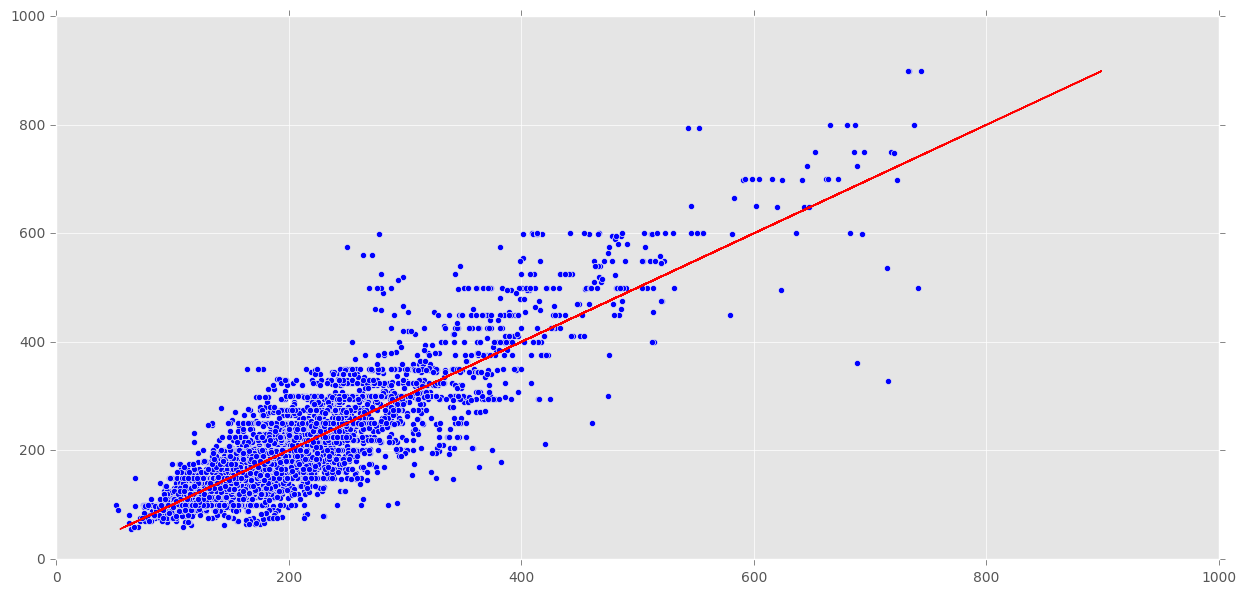

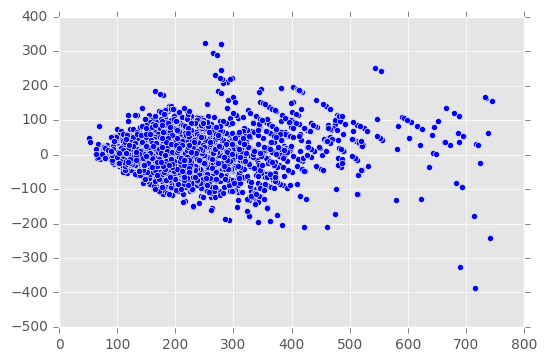

In [63]:
plt.subplots(figsize=(15,7))
plt.scatter(gb1_pred,y1_test)
plt.plot(y1_test,y1_test,'-',color='red')
plt.show()

plt.scatter(gb1_pred,y1_test-gb1_pred)
plt.show()